## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from collections import Counter

# Tratamento (entrega 2)
> Developed in "**/data_treatment.ipynb**"

# Caracterização (Entrega 3)

In [2]:
df_cleaned = pd.read_excel('output/school_ranged_years_cleaned_data.xlsx',
                           engine='openpyxl',
                           index_col=[0])
df_cleaned.head()

,ano,municipio,id_escola,nome_escola,aprovado,reprovado,abandono
15827,2020,SANTO ANDRE,8175,NADIR LESSA TOGNINI PROFESSORA,100.00,0.00,0.00
15828,2020,SANTO ANDRE,8709,ESTHER MEDINA PROFESSORA,100.00,0.00,0.00
15830,2020,SAO BERNARDO DO CAMPO,8783,PEDRA DE CARVALHO PROFESSORA,100.00,0.00,0.00
15831,2020,SAO BERNARDO DO CAMPO,8825,LAUDO FERREIRA DE CAMARGO MINISTRO,96.32,2.57,1.11
15832,2020,SAO BERNARDO DO CAMPO,8874,ROBERT KENNEDY SENADOR,100.00,0.00,0.00


## Ranking counties by school quantity from entire dataset

* Choosed 20 firsts with higher values

In [3]:
county_list = Counter(df_cleaned['municipio'].tolist())
final_list = []

for county in county_list:
    temp = {"county_name": county, "schools": county_list[county]} 
    final_list.append(temp)


ordered_list = sorted(final_list, key=lambda x: x['schools'], reverse=True)
county_name_list = [county['county_name'] for county in ordered_list[:20]]

df_cleaned = df_cleaned[df_cleaned['municipio'].isin(county_name_list)]

## Slicing dataframe by years

In [4]:
df_2019 = df_cleaned[df_cleaned['ano'] == 2019]
df_2020 = df_cleaned[df_cleaned['ano'] == 2020]
df_2021 = df_cleaned[df_cleaned['ano'] == 2021]

## Creating Standard bypass

In [5]:
row_labels = ['2019', '2020', '2021']
columns = ['aprovado', 'reprovado', 'abandono']

In [100]:
std_2019 = [round(df_2019['aprovado'].std(), 2), round(df_2019['reprovado'].std(), 2), round(df_2019['abandono'].std(), 2)]
std_2020 = [round(df_2020['aprovado'].std(), 2), round(df_2020['reprovado'].std(), 2), round(df_2020['abandono'].std(), 2)]
std_2021 = [round(df_2021['aprovado'].std(), 2), round(df_2021['reprovado'].std(), 2), round(df_2021['abandono'].std(), 2)]

df_std = pd.DataFrame([std_2019, std_2020, std_2021], columns=columns)
df_std.index = row_labels
df_std

,aprovado,reprovado,abandono
2019,9.59,7.97,4.08
2020,6.01,5.01,1.74
2021,5.35,4.78,2.30


## Creating Central Tendency 

### Mean

In [94]:
mean_2019 = [round(df_2019['aprovado'].mean(), 2), round(df_2019['reprovado'].mean(), 2), round(df_2019['abandono'].mean(), 2)]
mean_2020 = [round(df_2020['aprovado'].mean(), 2), round(df_2020['reprovado'].mean(), 2), round(df_2020['abandono'].mean(), 2)]
mean_2021 = [round(df_2021['aprovado'].mean(), 2), round(df_2021['reprovado'].mean(), 2), round(df_2021['abandono'].mean(), 2)]

df_mean = pd.DataFrame([mean_2019, mean_2020, mean_2021], columns=columns)
df_mean.index = row_labels
df_mean

,aprovado,reprovado,abandono
2019,88.24,8.61,3.15
2020,97.55,1.96,0.38
2021,96.76,2.58,0.66


### Quantile

In [101]:
quantile_2019 = [round(df_2019['aprovado'].quantile(), 2), round(df_2019['reprovado'].quantile(), 2), round(df_2019['abandono'].quantile(), 2)]
quantile_2020 = [round(df_2020['aprovado'].quantile(), 2), round(df_2020['reprovado'].quantile(), 2), round(df_2020['abandono'].quantile(), 2)]
quantile_2021 = [round(df_2021['aprovado'].quantile(), 2), round(df_2021['reprovado'].quantile(), 2), round(df_2021['abandono'].quantile(), 2)]

df_quantile = pd.DataFrame([quantile_2019, quantile_2020, quantile_2021], columns=columns)
df_quantile.index = row_labels
df_quantile

,aprovado,reprovado,abandono
2019,89.92,7.18,1.45
2020,100.00,0.00,0.00
2021,99.40,0.00,0.00


### Creating a Correlation Matrix

In [9]:
correlation_2019 = df_2019[['aprovado', 'reprovado', 'abandono']].corr()
correlation_2020 = df_2020[['aprovado', 'reprovado', 'abandono']].corr()
correlation_2021 = df_2021[['aprovado', 'reprovado', 'abandono']].corr()

# Visualização das informações (Entrega 4)

## Standard deviation with mean plot (Function)

In [133]:
def plot_std (column):
    years = ['2019', '2020', '2021']
    x_pos = np.arange(len(years))
    CTEs = [float(std) for std in df_mean[column].tolist()]
    error = [float(std) for std in df_std[column].tolist()]
    
    # Build the plot
    fig, ax = plt.subplots()
    ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
    ax.set_ylabel('Média')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(years)
    ax.set_title('Desvio padrão para indice de '+ column +' (2019 -2021)')
    ax.yaxis.grid(True)

    # Save the figure and show
    plt.tight_layout()
    plt.show()

### Standard deviation with mean plot (Aprovado)

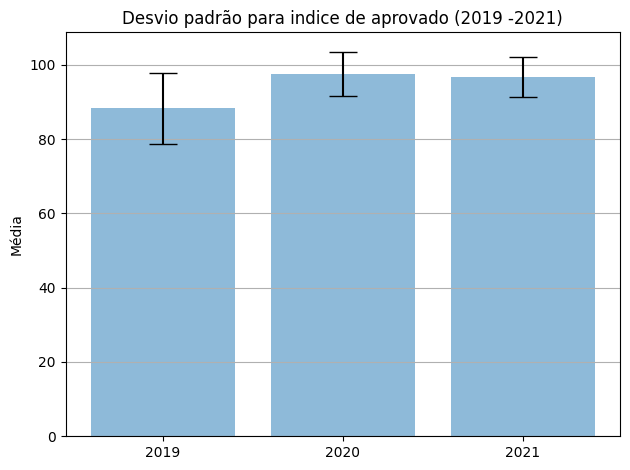

In [134]:
plot_std('aprovado')

### Standard deviation with mean plot (Reprovado)

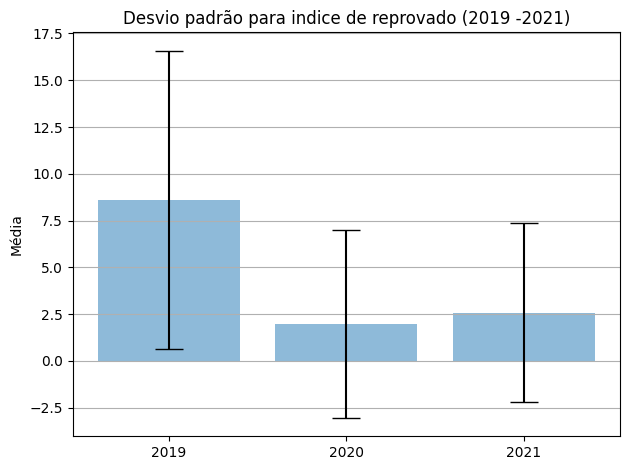

In [135]:
plot_std('reprovado')

### Standard deviation with mean plot (Abandono)

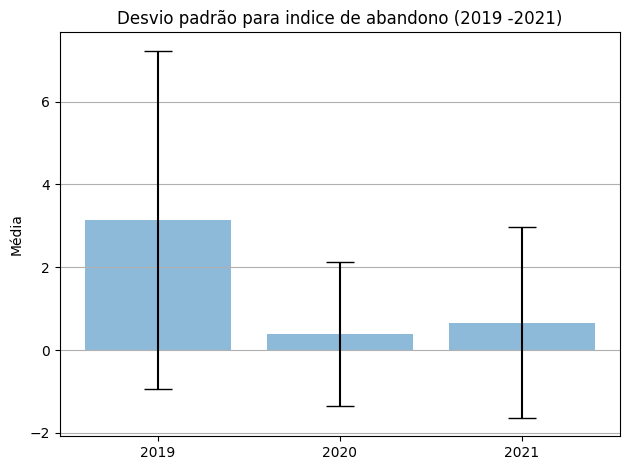

In [136]:
plot_std('abandono')

## Correlation matrix plot

### 2019

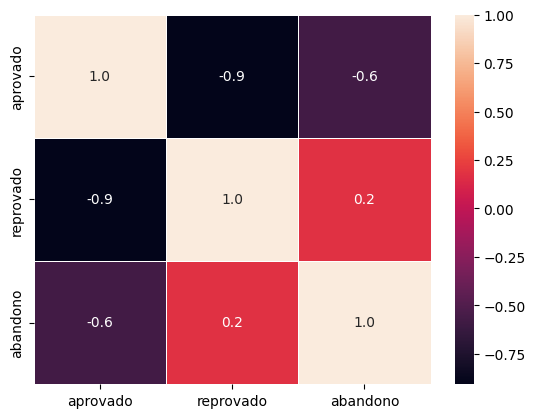

In [12]:
plot_correlation_2019 = sn.heatmap(correlation_2019, annot = True, fmt=".1f", linewidths=.6)

### 2020

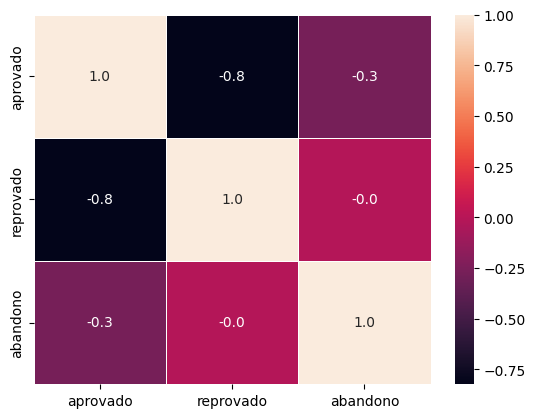

In [13]:
plot_correlation_2020 = sn.heatmap(correlation_2020, annot = True, fmt=".1f", linewidths=.6)

### 2021

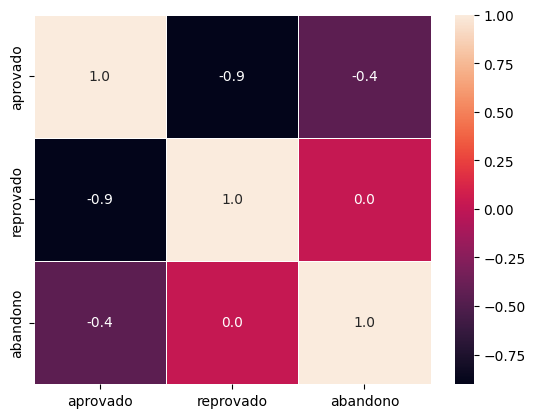

In [14]:
plot_correlation_2021 = sn.heatmap(correlation_2021, annot = True, fmt=".1f", linewidths=.6)